# NEtflix dataset


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
#load data
df= pd.read_csv("/Users/mac/Courses/10Alytics/netflix_titles.csv")

In [3]:
#Get first 5rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
#dimensionalism
df.shape

(6234, 12)

In [5]:
df.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [7]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
# Missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values>0]
missing_values

director      1969
cast           570
country        476
date_added      11
rating          10
dtype: int64

<AxesSubplot:>

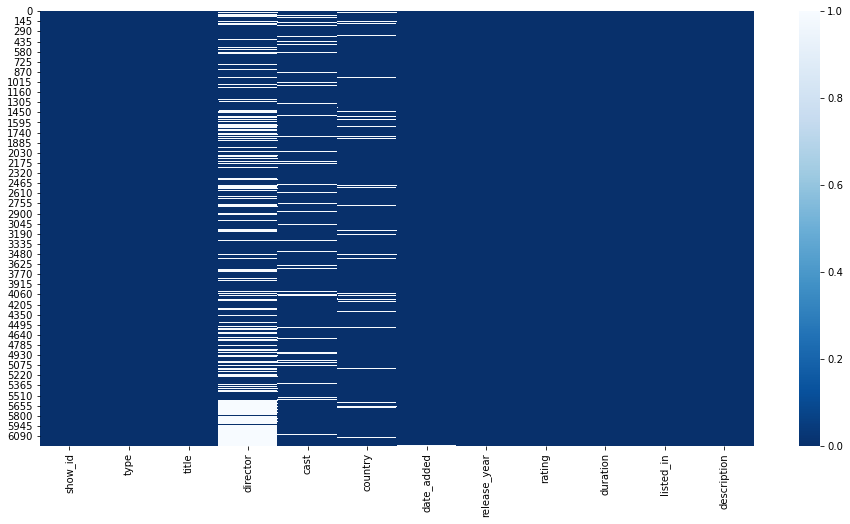

In [9]:
#Missing data visualization
plt.figure(figsize = (16, 8))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r")

<AxesSubplot:>

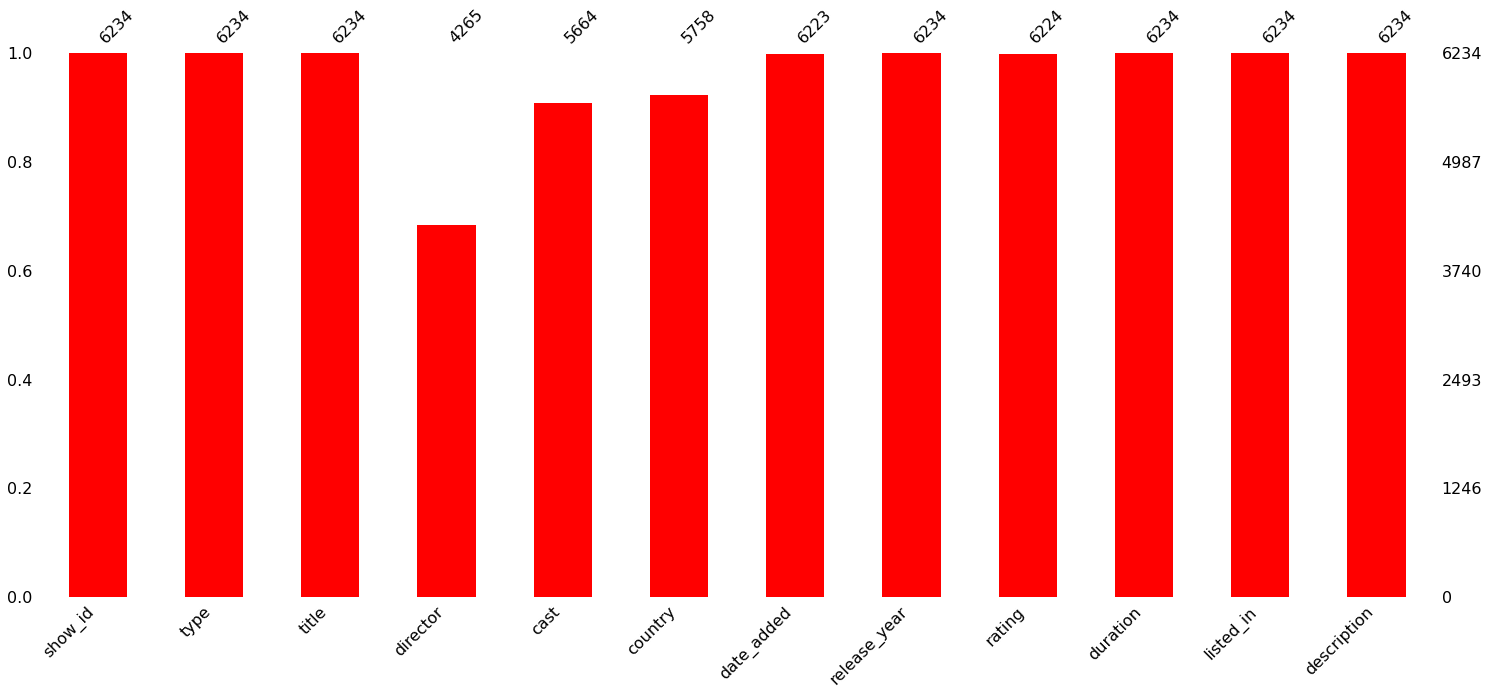

In [10]:
msno.bar(df, color="red")

In [11]:
missing_values

director      1969
cast           570
country        476
date_added      11
rating          10
dtype: int64

In [12]:
# when dealing with missing data.  its in two ways. either categorical(Mode)or numerical column(Mean, Media , Mode)
# Director - is an object so its Categorical
# Cast - Also categorical
# Country - also Categorical
# Date Added -  Categorical
# Rating - Categorical
# you use unknown for categorical data.

In [13]:
# input missing value Categprical datas
df["director"] = df["director"].fillna("Unknown")
df["cast"] = df["cast"].fillna("Unknown")
df["country"] = df["country"].fillna("Unknown")

In [14]:
#INput missing values using Mode
df["date_added"] = df["date_added"].fillna(df["date_added"].mode()[0])
df["rating"] = df["rating"].fillna(df["rating"].mode()[0])

<AxesSubplot:>

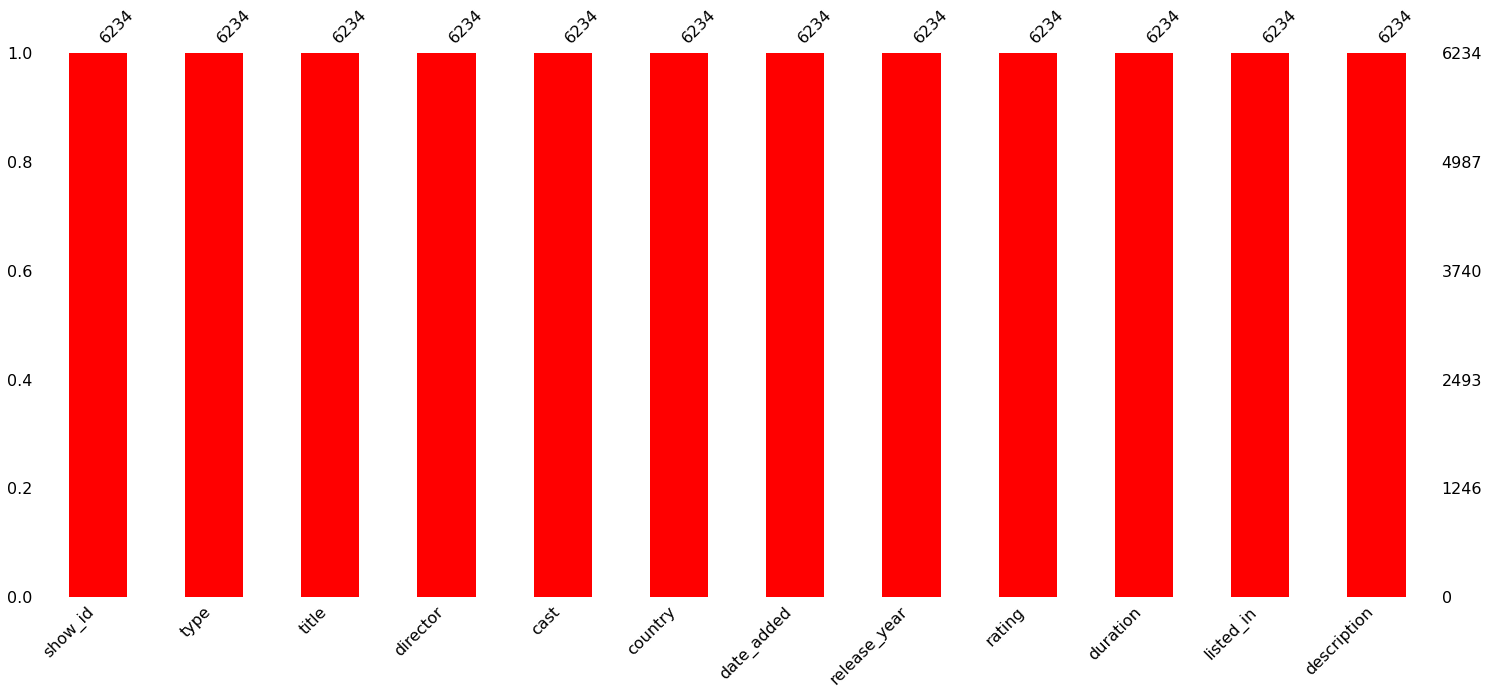

In [15]:
msno.bar(df, color="red")

In [16]:
missing_values

director      1969
cast           570
country        476
date_added      11
rating          10
dtype: int64

In [17]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values>0]
missing_values

Series([], dtype: int64)

In [18]:
#how many movies were created on a yearly basis
data = df.groupby("release_year").count().sort_values(ascending = False, by = "show_id")[0:5]
data

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
release_year,,,,,,,,,,,
2018,1063,1063,1063,1063,1063,1063,1063,1063,1063,1063,1063
2017,959,959,959,959,959,959,959,959,959,959,959
2019,843,843,843,843,843,843,843,843,843,843,843
2016,830,830,830,830,830,830,830,830,830,830,830
2015,517,517,517,517,517,517,517,517,517,517,517


In [19]:
#plt.figure(figsize = (13, 8))
#sns.barplot(x = "release_year", y="show_id", data=df, order=df["release_year"], palette = "rainbow_r")
#sns.despine(left=True)

Text(0.5, 1.0, 'Total number of shows according to the type')

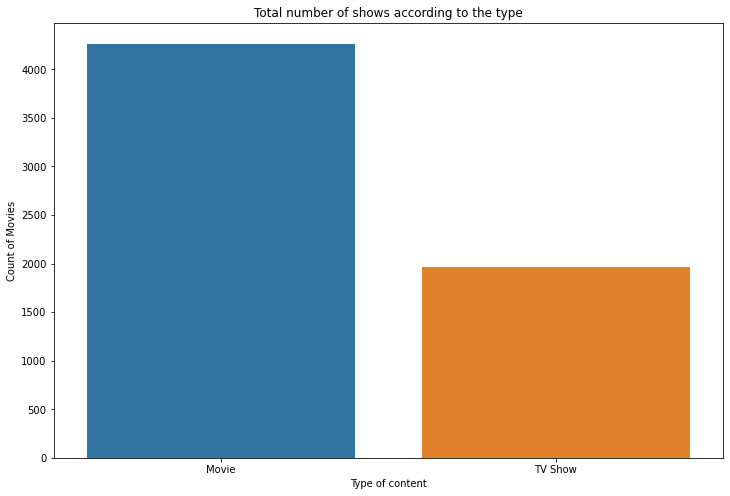

In [20]:
# investigate the type of content and quality
plt.figure(figsize = (12, 8))
sns.countplot(x="type", data=df)
plt.xlabel("Type of content")
plt.ylabel("Count of Movies")
plt.title("Total number of shows according to the type")


In [21]:
# year with the highest no of shows
release = df.groupby("release_year").count().reset_index().sort_values(ascending=False, by="show_id")[0:9]
release


,release_year,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
69,2018,1063,1063,1063,1063,1063,1063,1063,1063,1063,1063,1063
68,2017,959,959,959,959,959,959,959,959,959,959,959
70,2019,843,843,843,843,843,843,843,843,843,843,843
67,2016,830,830,830,830,830,830,830,830,830,830,830
66,2015,517,517,517,517,517,517,517,517,517,517,517
65,2014,288,288,288,288,288,288,288,288,288,288,288
64,2013,237,237,237,237,237,237,237,237,237,237,237
63,2012,183,183,183,183,183,183,183,183,183,183,183
61,2010,149,149,149,149,149,149,149,149,149,149,149


Text(0.5, 1.0, 'Total number of shows by release year')

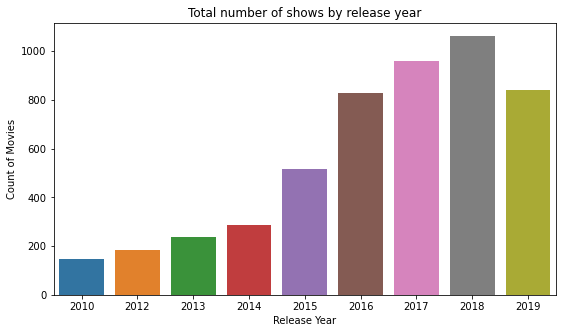

In [22]:
# year with the highest no of shows
plt.figure(figsize = (9, 5))
sns.barplot(x="release_year", data= release, y="show_id")
plt.xlabel("Release Year")
plt.ylabel("Count of Movies")
plt.title("Total number of shows by release year")

In [ ]:
# date_ added,  rating

In [23]:
date = df.groupby("date_added").count().reset_index().sort_values(ascending=False, by="show_id")[0:9]
date

,date_added,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description
784,"January 1, 2020",133,133,133,133,133,133,133,133,133,133,133
1230,"November 1, 2019",94,94,94,94,94,94,94,94,94,94,94
1053,"March 1, 2018",78,78,78,78,78,78,78,78,78,78,78
667,"December 31, 2019",74,74,74,74,74,74,74,74,74,74,74
1322,"October 1, 2018",72,72,72,72,72,72,72,72,72,72,72
1323,"October 1, 2019",71,71,71,71,71,71,71,71,71,71,71
881,"July 1, 2019",60,60,60,60,60,60,60,60,60,60,60
1229,"November 1, 2018",59,59,59,59,59,59,59,59,59,59,59
782,"January 1, 2018",54,54,54,54,54,54,54,54,54,54,54


Text(0.5, 1.0, 'Total number of shows by the date added')

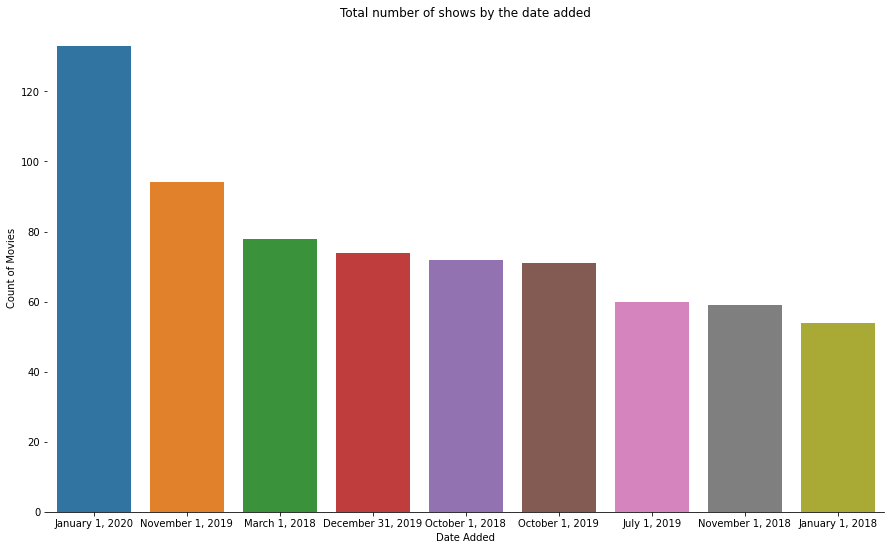

In [29]:
plt.figure(figsize = (15, 9))
sns.barplot(x="date_added", data= date, y="show_id")
sns.despine(left=True)
plt.xlabel("Date Added")
plt.ylabel("Count of Movies")
plt.title("Total number of shows by the date added")

In [26]:
# year with the highest no of shows
rating = df.groupby("rating").count().reset_index().sort_values(ascending=False, by="show_id")[0:9]
rating

,rating,show_id,type,title,director,cast,country,date_added,release_year,duration,listed_in,description
8,TV-MA,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037
6,TV-14,1698,1698,1698,1698,1698,1698,1698,1698,1698,1698,1698
9,TV-PG,701,701,701,701,701,701,701,701,701,701,701
5,R,508,508,508,508,508,508,508,508,508,508,508
4,PG-13,286,286,286,286,286,286,286,286,286,286,286
2,NR,218,218,218,218,218,218,218,218,218,218,218
3,PG,184,184,184,184,184,184,184,184,184,184,184
11,TV-Y7,169,169,169,169,169,169,169,169,169,169,169
7,TV-G,149,149,149,149,149,149,149,149,149,149,149


Text(0.5, 1.0, 'Total number of shows by rating')

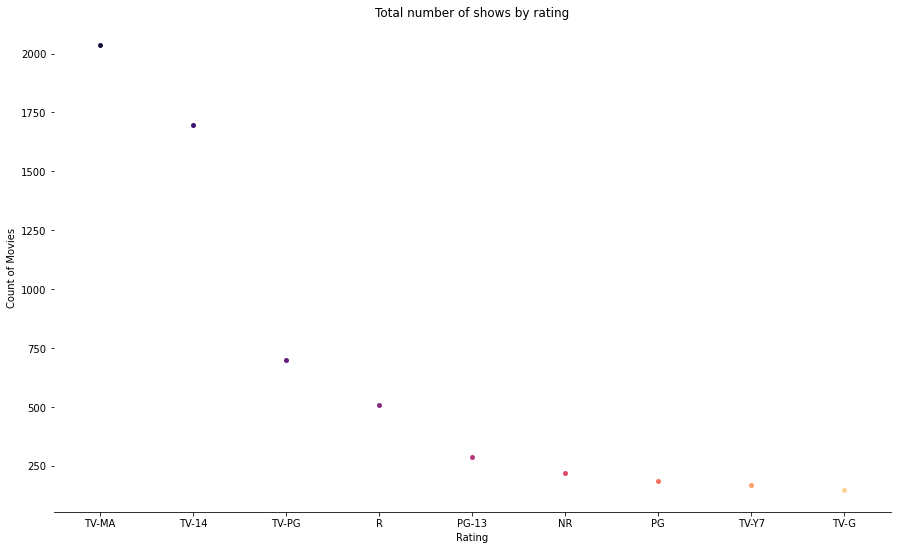

In [31]:
plt.figure(figsize = (15, 9))
sns.swarmplot(x="rating", data= rating, y="show_id", palette = "magma")
sns.despine(left=True)
plt.xlabel("Rating")
plt.ylabel("Count of Movies")
plt.title("Total number of shows by rating")

In [ ]:
#use media when there is an outlier
#use mode for categorical data
#machine learning work better with numerical better and not categorical data and that is where label encdding comes in